In [1]:
import numpy as np
import scipy as sp
import random as rand
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
class room:
    def __init__(self, id):
        self.exits = []
        self.exitCt = 0
        self.id = id
    
    def toString(self):
        return "Room: %d Exct: %s Exits: %s" %(self.id,self.exitCt,self.exits)

In [3]:
testRoom = room(1)
print(testRoom.toString())

Room: 1 Exct: 0 Exits: []


In [4]:
def roomBuilder(rmList, rmCt):
    maxNeighbors = np.log(rmCt)
    
    for i in range(rmCt + 1):
        newRoom = room(i + 1)
        neighbor = rmList[rand.randint(0,i)]
        
        while (len(neighbor.exits) >= maxNeighbors):
            neighbor = rmList[rand.randint(0,i)]
        
        
        newRoom.exitCt += 1
        newRoom.exits.append(neighbor.id)
        if ((neighbor.exitCt > 1) and (rand.random() > 0.5)):
            loopRoom = neighbor.exits[rand.randint(0,len(neighbor.exits) -1)]
            newRoom.exitCt +=1
            newRoom.exits.append(loopRoom)
            rmList[loopRoom].exits.append(newRoom.id)
            rmList[loopRoom].exitCt += 1
            
        neighbor.exits.append(newRoom.id)
        neighbor.exitCt += 1
            
            
        
        rmList.append(newRoom)

    return rmList

In [9]:
rand.seed(3)

rmList = []
newRoom = room(0)
rmList.append(newRoom)
rmList = roomBuilder(rmList, 25)

for i in range(len(rmList)):
    print (rmList[i].toString())


Room: 0 Exct: 6 Exits: [1, 2, 6, 7, 8, 9]
Room: 1 Exct: 3 Exits: [0, 3, 20]
Room: 2 Exct: 3 Exits: [0, 6, 7]
Room: 3 Exct: 6 Exits: [1, 4, 10, 11, 19, 26]
Room: 4 Exct: 4 Exits: [3, 5, 10, 19]
Room: 5 Exct: 1 Exits: [4]
Room: 6 Exct: 4 Exits: [0, 2, 9, 21]
Room: 7 Exct: 3 Exits: [2, 0, 8]
Room: 8 Exct: 2 Exits: [7, 0]
Room: 9 Exct: 4 Exits: [6, 0, 12, 24]
Room: 10 Exct: 3 Exits: [3, 4, 11]
Room: 11 Exct: 3 Exits: [10, 3, 26]
Room: 12 Exct: 4 Exits: [9, 13, 16, 17]
Room: 13 Exct: 4 Exits: [12, 14, 15, 16]
Room: 14 Exct: 2 Exits: [13, 18]
Room: 15 Exct: 1 Exits: [13]
Room: 16 Exct: 3 Exits: [12, 13, 17]
Room: 17 Exct: 2 Exits: [12, 16]
Room: 18 Exct: 2 Exits: [14, 25]
Room: 19 Exct: 2 Exits: [4, 3]
Room: 20 Exct: 2 Exits: [1, 23]
Room: 21 Exct: 2 Exits: [6, 22]
Room: 22 Exct: 1 Exits: [21]
Room: 23 Exct: 1 Exits: [20]
Room: 24 Exct: 1 Exits: [9]
Room: 25 Exct: 1 Exits: [18]
Room: 26 Exct: 2 Exits: [11, 3]


In [10]:
G=nx.Graph()
listOfExits = []


for i in range(len(rmList)):
    G.add_node(i)
    listOfExits.append(rmList[i].exitCt)
    
for i in range(len(rmList)):
    for j in range(len(rmList[i].exits)):
        G.add_edge(i,rmList[i].exits[j])
    


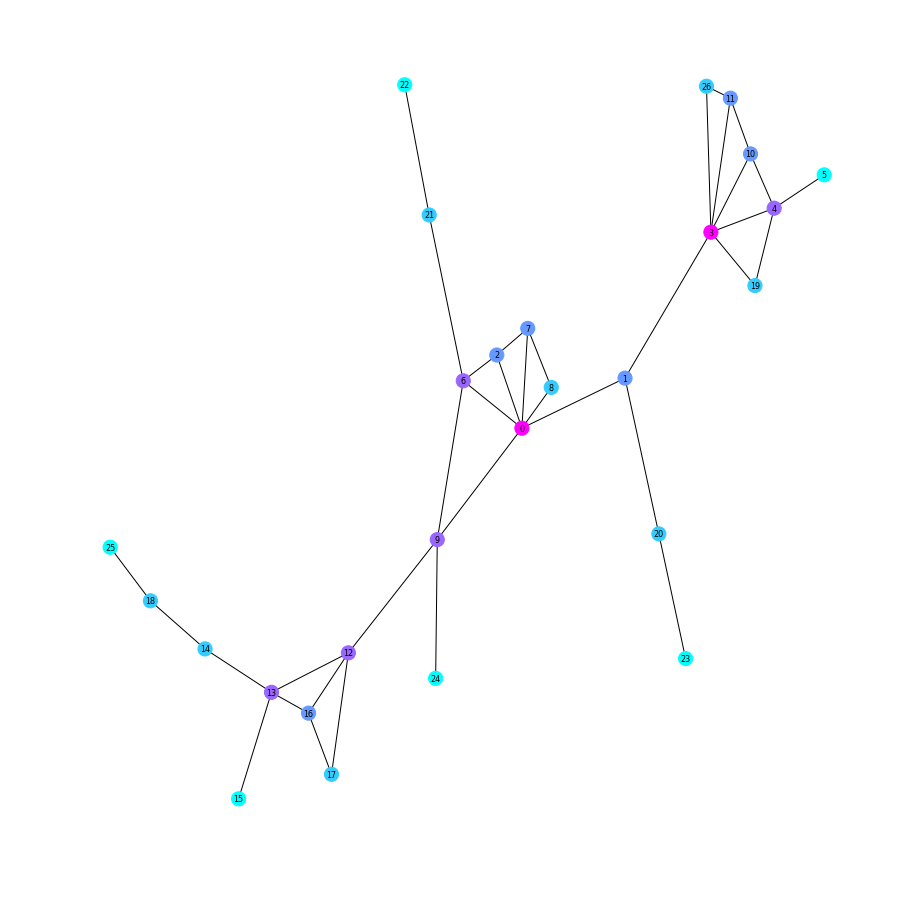

{0: array([ 6.09403743,  0.21736012]), 1: array([ 32.66378247,   4.14735529]), 2: array([-0.37788463,  5.9615259 ]), 3: array([ 54.79256333,  15.60384991]), 4: array([ 71.09371346,  17.48592886]), 5: array([ 83.99199078,  20.10246733]), 6: array([-9.01729288,  3.93632604]), 7: array([ 7.60156954,  8.05163102]), 8: array([ 13.65291579,   3.4189171 ]), 9: array([-15.71178242,  -8.53003782]), 10: array([ 64.99846328,  21.74742235]), 11: array([ 59.80927978,  26.12387161]), 12: array([-38.61488997, -17.42003873]), 13: array([-58.43281444, -20.51794612]), 14: array([-75.55810295, -17.11250666]), 15: array([-66.90581507, -28.87845387]), 16: array([-48.88668659, -22.15126362]), 17: array([-42.96910759, -26.95239417]), 18: array([-89.63194332, -13.33602682]), 19: array([ 66.14298209,  11.4096894 ]), 20: array([ 41.37331636,  -8.0815258 ]), 21: array([-17.79678605,  16.95429475]), 22: array([-24.10712182,  27.17480383]), 23: array([ 48.27504267, -17.8676456 ]), 24: array([-16.13419503, -19.4187

In [11]:
plt.set_cmap('cool')
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G,dim=2, iterations=100, scale= 100, center=(0,0))
nx.draw(G, node_size=200, with_labels=True, font_size=8, node_color=(listOfExits), pos=pos)
plt.show()
print(pos)

In [12]:
for i in range(len(pos)):
    tempstr = str(i) + ' ' + str(pos[i][0]) + ' ' + str(pos[i][1]) + ' ' + str(rmList[i].exits)
    print(tempstr)


0 6.09403742585 0.217360118654 [1, 2, 6, 7, 8, 9]
1 32.6637824717 4.14735528712 [0, 3, 20]
2 -0.377884626419 5.96152590481 [0, 6, 7]
3 54.7925633304 15.6038499073 [1, 4, 10, 11, 19, 26]
4 71.0937134588 17.4859288614 [3, 5, 10, 19]
5 83.9919907828 20.1024673321 [4]
6 -9.0172928833 3.93632604383 [0, 2, 9, 21]
7 7.60156953699 8.05163102325 [2, 0, 8]
8 13.6529157901 3.41891710379 [7, 0]
9 -15.7117824179 -8.53003781618 [6, 0, 12, 24]
10 64.9984632805 21.7474223476 [3, 4, 11]
11 59.8092797769 26.1238716059 [10, 3, 26]
12 -38.6148899651 -17.4200387311 [9, 13, 16, 17]
13 -58.4328144407 -20.5179461237 [12, 14, 15, 16]
14 -75.558102954 -17.1125066569 [13, 18]
15 -66.9058150673 -28.8784538731 [13]
16 -48.8866865893 -22.1512636196 [12, 13, 17]
17 -42.9691075924 -26.9523941672 [12, 16]
18 -89.6319433153 -13.3360268208 [14, 25]
19 66.142982087 11.4096893987 [4, 3]
20 41.3733163625 -8.08152579723 [1, 23]
21 -17.796786047 16.9542947488 [6, 22]
22 -24.1071218232 27.1748038332 [21]
23 48.2750426738 -17.